In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/Symptom2Disease.csv', index_col=0)
data.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


# Text Cleaning

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
# combining strings to carry out analysis
combined_str = ''
for i in range(1200):
    combined_str = combined_str +" "+data.iat[i, 1]

combined_str = combined_str.lower()
tokens = word_tokenize(combined_str)
print(tokens)

['i', 'have', 'been', 'experiencing', 'a', 'skin', 'rash', 'on', 'my', 'arms', ',', 'legs', ',', 'and', 'torso', 'for', 'the', 'past', 'few', 'weeks', '.', 'it', 'is', 'red', ',', 'itchy', ',', 'and', 'covered', 'in', 'dry', ',', 'scaly', 'patches', '.', 'my', 'skin', 'has', 'been', 'peeling', ',', 'especially', 'on', 'my', 'knees', ',', 'elbows', ',', 'and', 'scalp', '.', 'this', 'peeling', 'is', 'often', 'accompanied', 'by', 'a', 'burning', 'or', 'stinging', 'sensation', '.', 'i', 'have', 'been', 'experiencing', 'joint', 'pain', 'in', 'my', 'fingers', ',', 'wrists', ',', 'and', 'knees', '.', 'the', 'pain', 'is', 'often', 'achy', 'and', 'throbbing', ',', 'and', 'it', 'gets', 'worse', 'when', 'i', 'move', 'my', 'joints', '.', 'there', 'is', 'a', 'silver', 'like', 'dusting', 'on', 'my', 'skin', ',', 'especially', 'on', 'my', 'lower', 'back', 'and', 'scalp', '.', 'this', 'dusting', 'is', 'made', 'up', 'of', 'small', 'scales', 'that', 'flake', 'off', 'easily', 'when', 'i', 'scratch', 'the

In [5]:
from string import punctuation
from nltk.corpus import stopwords

In [6]:
stop = stopwords.words("english")
punctuation = word_tokenize(punctuation)
stop = stop + punctuation + ['.', "'ve", "'m", "'s", "n't" ] 
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
new_tokens = [word for word in tokens if word not in stop]

In [8]:
print("Number of words before removing stop words ", len(tokens))
print("NUmber of words after removing stop words ", len(new_tokens))

Number of words before removing stop words  43418
NUmber of words after removing stop words  18524


In [9]:
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

In [10]:
lemm= WordNetLemmatizer()
lemm_tokens = [lemm.lemmatize(word) for word in new_tokens ]

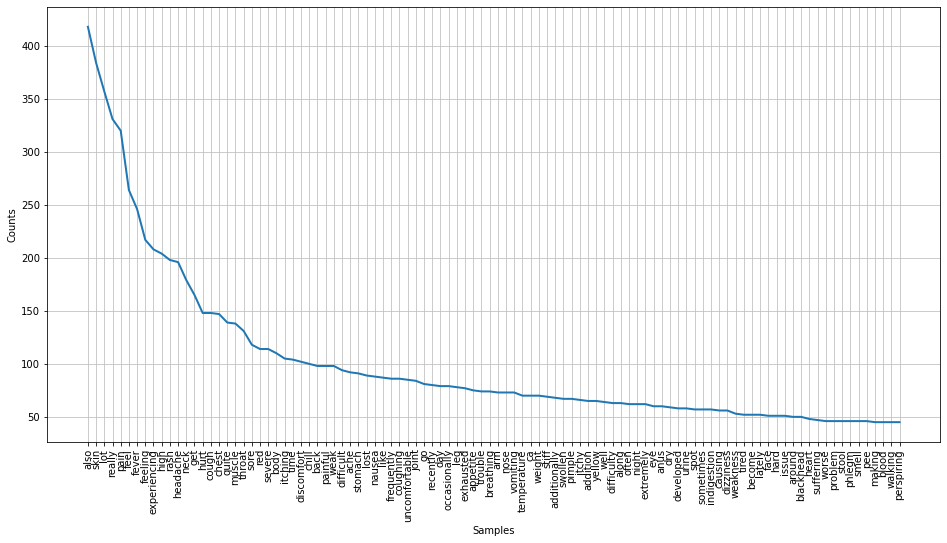

In [11]:
from matplotlib.pyplot import figure
figure(figsize = (16,8))

fdist = FreqDist(lemm_tokens)
fdist.plot(100, cumulative = False)
plt.show()

In [12]:
# Also removing a few custom stop words. These words are very common in the dataset but do not carry meaning or inclination towards a class
remove =  ['also', 'lot', 'really' ,'along', 'like', 'feel', 'become', 'experiencing', 'get', 'often', 'sometimes', 'go', 'making', 'seem', 'causing', 'feeling', 'lately', 'recently', 'quite']

In [13]:
rem_tokens = [word for word in lemm_tokens if word not in remove]

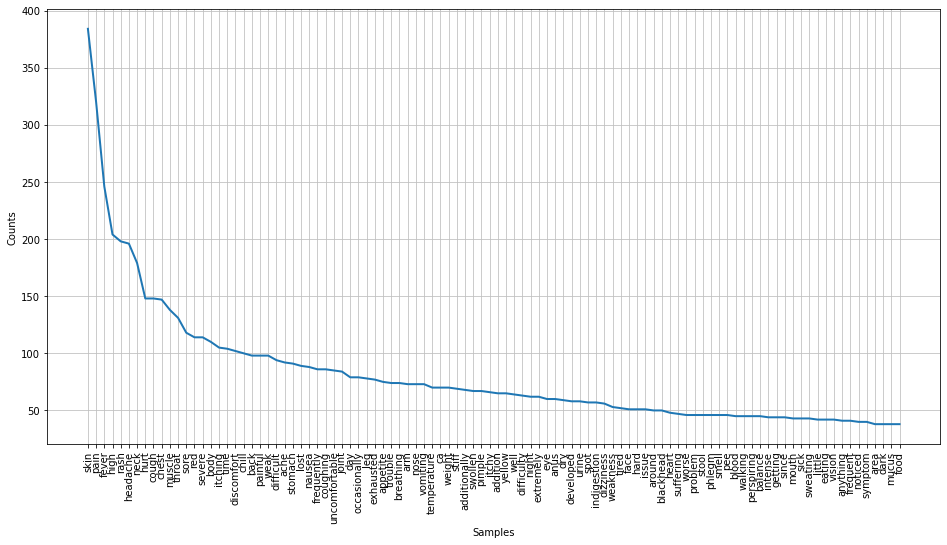

In [14]:
from matplotlib.pyplot import figure
figure(figsize = (16,8))

fdist = FreqDist(rem_tokens)
fdist.plot(100, cumulative = False)
plt.show()

In [15]:
# difing the clean text function
def clean_text(text):
    token = word_tokenize(text.lower())
    words = [lemm.lemmatize(word) for word in token if word not in stop]
    words = [word for word in words if word not in remove]
    new_text = " ".join(words)
    return new_text

In [16]:
data['clean_text'] = data.text.apply(clean_text)
data.head()

,label,text,clean_text
0,Psoriasis,I have been experiencing a skin rash on my arm...,skin rash arm leg torso past week red itchy co...
1,Psoriasis,"My skin has been peeling, especially on my kne...",skin peeling especially knee elbow scalp peeli...
2,Psoriasis,I have been experiencing joint pain in my fing...,joint pain finger wrist knee pain achy throbbi...
3,Psoriasis,"There is a silver like dusting on my skin, esp...",silver dusting skin especially lower back scal...
4,Psoriasis,"My nails have small dents or pits in them, and...",nail small dent pit inflammatory tender touch ...


# Converting to numerical array

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features = 500)

In [18]:
X = vectorizer.fit_transform(data['clean_text'])
TFIDF = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [19]:
print(vectorizer.get_feature_names())

['abdomen', 'abdominal', 'ability', 'able', 'accompanied', 'ache', 'aching', 'acid', 'acidic', 'acidity', 'activity', 'addition', 'additionally', 'aftertaste', 'almost', 'always', 'anus', 'anything', 'appear', 'appeared', 'appears', 'appetite', 'area', 'arm', 'around', 'asleep', 'away', 'awful', 'back', 'bad', 'balance', 'balanced', 'ball', 'bathroom', 'beating', 'becomes', 'becoming', 'behalf', 'behind', 'belching', 'believe', 'belly', 'besides', 'bitter', 'black', 'blackhead', 'bleeding', 'bleeds', 'blistering', 'bloated', 'bloating', 'blocked', 'blood', 'bloody', 'blurred', 'body', 'bothered', 'bothering', 'bowel', 'brain', 'breath', 'breathe', 'breathing', 'brownish', 'bruise', 'bump', 'bumpy', 'burning', 'burping', 'butt', 'ca', 'calf', 'catch', 'cause', 'caused', 'certain', 'challenging', 'change', 'changed', 'cheek', 'chest', 'chill', 'chilly', 'chronic', 'clogged', 'cloudy', 'cold', 'color', 'colored', 'colour', 'come', 'coming', 'completely', 'concentrate', 'concentrating', 'c

# Training machine learning models

In [20]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['class'] = encode.fit_transform(data.label)

In [21]:
x = TFIDF
y = data['class']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

### Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [24]:
lg.fit(xtrain, ytrain)

LogisticRegression()

In [25]:
pred_train = lg.predict(xtrain)

In [26]:
accuracy_score(ytrain, pred_train)

0.99375

In [27]:
pred_test = lg.predict(xtest)

In [28]:
accuracy_score(ytest, pred_test)

0.9458333333333333

In [29]:
with np.printoptions(threshold=np.inf):
    print(confusion_matrix(ytest, pred_test))

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

In [30]:
with np.printoptions(threshold=np.inf):
    print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.85      1.00      0.92        11
           5       1.00      1.00      1.00        10
           6       0.89      0.80      0.84        10
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       0.90      1.00      0.95         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         6
          16       1.00      0.89      0.94         9
          17       1.00    

### Support Vector Machines

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')

In [32]:
svm.fit(xtrain, ytrain)

SVC()

In [33]:
pred_train = svm.predict(xtrain)

In [34]:
accuracy_score(ytrain, pred_train)

1.0

In [35]:
pred_test = svm.predict(xtest)

In [36]:
accuracy_score(ytest, pred_test)

0.9583333333333334

In [37]:
with np.printoptions(threshold=np.inf):
    print(confusion_matrix(ytest, pred_test))

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

In [38]:
with np.printoptions(threshold=np.inf):
    print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.85      1.00      0.92        11
           5       1.00      0.90      0.95        10
           6       0.89      0.80      0.84        10
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         6
          16       1.00      0.89      0.94         9
          17       1.00    

### Multi-Layer Perceptron

In [39]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation = 'logistic', hidden_layer_sizes=(150), max_iter = 10000)

In [40]:
mlp.fit(xtrain, ytrain)

MLPClassifier(activation='logistic', hidden_layer_sizes=150, max_iter=10000)

In [41]:
pred_train = mlp.predict(xtrain)

In [42]:
accuracy_score(ytrain, pred_train)

1.0

In [43]:
pred_test = mlp.predict(xtest)

In [44]:
accuracy_score(ytest, pred_test)

0.9541666666666667

In [45]:
with np.printoptions(threshold=np.inf):
    print(confusion_matrix(ytest, pred_test))

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  2  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

In [46]:
with np.printoptions(threshold=np.inf):
    print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.85      1.00      0.92        11
           5       1.00      0.80      0.89        10
           6       0.89      0.80      0.84        10
           7       1.00      1.00      1.00         9
           8       0.86      1.00      0.92         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        12
          14       0.90      1.00      0.95         9
          15       1.00      1.00      1.00         6
          16       1.00      0.89      0.94         9
          17       1.00    

In [47]:
# Loading dataset which has suggestions for different diseases
suggestions = pd.read_excel('./data/suggestions.xlsx')
suggestions.columns = suggestions.columns.str.strip()
suggestions = suggestions.set_index('Disease')
suggestions.head()

,Suggestion
Disease,
Psoriasis,"You can apply creams, ointments and solutions ..."
Varicose Veins,Do regular exercises for better blood circulat...
Typhoid,A course of antibiotic tablets like ciprofloxa...
Chicken pox,Apply calamine lotion and take cool baths with...
Impetigo,Use mupirocin antibiotic ointment or just appl...


In [48]:
# defining the final function
def predict(text):
    text = [clean_text(text)]
    row_vector = vectorizer.transform(text).toarray()
    p1 = lg.predict(row_vector)
    p2 = svm.predict(row_vector)
    p3 = mlp.predict(row_vector)
    
    #Ensemble method - combining the thre predictions - choosing the most common predicted class
    if p1 == p2 == p3:
        p = p1
    elif p1 == p2:
        p = p1
    elif p1 == p3:
        p = p1
    elif p2 == p3:
        p = p2
    else:
        p = p2
    disease = encode.inverse_transform(p)
    result =  ("According to the disease prediction model, you are suffering from " + disease + ". The suggested steps are - " +
    suggestions.at[disease[0], 'Suggestion'] + " Consult your doctor if your contition worsens.")
    return result[0]
    

In [49]:
import pickle

with open('trained_model.pkl', 'wb') as file:
    pickle.dump((vectorizer, lg, svm, mlp, encode), file)

# Results

In [50]:
predict("I have cough with phlegm or pus, fever, chills")

'According to the disease prediction model, you are suffering from Pneumonia. The suggested steps are - Take antibiotics and use pain relievers such as aspirin etc. Consult your doctor if your contition worsens.'

In [51]:
predict("I have joint pain, swelling, and stiffness.")

'According to the disease prediction model, you are suffering from Arthritis. The suggested steps are - Nonsteroidal drugs can relieve pain and reduce inflammation. Some creams that contain menthol or capsaicin can be applied. Consult your doctor if your contition worsens.'

In [52]:
predict("I have blackheads and pimples on my face")

'According to the disease prediction model, you are suffering from Acne. The suggested steps are - Apply apple cider vinegar, make a honey and cinnamon mask and take spot treatments to heal pimples. Consult your doctor if your contition worsens.'

In [53]:
predict("I have a dry mouth and i tend to urinate frequently")

'According to the disease prediction model, you are suffering from diabetes. The suggested steps are - Take care of your food habits; Eat non-starchy vegetables, leafy greens, fatty fish, etc. Consult your doctor if your contition worsens.'

In [54]:
predict("I have headache and tiredness")

'According to the disease prediction model, you are suffering from Hypertension. The suggested steps are - Exercise regularly, quit smoking, reduce stress, and eat a healthy diet. Also get a good night sleep. Consult your doctor if your contition worsens.'